# Background frequencies

In [2]:
from katlas.core import *
import pandas as pd

In [3]:
df = Data.get_ks_unique()

## PSSMs - ks dataset

In [5]:
def get_bg_dict(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    site_pssm = get_prob(site, seq_col)
    return flatten_pssm(site_pssm, True)

In [6]:
acceptors = ['S','T','Y','ST','STY']

In [7]:
index_names = 'ks_' + pd.Series(acceptors)

In [8]:
bg_pssms = pd.DataFrame([get_bg_dict(df,acceptor) for acceptor in acceptors],index=index_names)

In [9]:
bg_pssms

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
ks_S,0.07430,0.06810,0.07593,0.01466,0.05325,0.03852,0.05129,0.04034,0.07899,0.02027,...,0.02129,0.07033,0.05931,0.04420,0.03627,0.05488,0.07732,0.04346,0.01498,0.00645
ks_T,0.06163,0.06590,0.07427,0.01644,0.04383,0.03439,0.05966,0.04018,0.08948,0.02481,...,0.02239,0.07507,0.06056,0.04526,0.03801,0.05867,0.07664,0.03548,0.01987,0.00899
ks_Y,0.05618,0.07242,0.07067,0.01595,0.04448,0.03877,0.05589,0.04594,0.08632,0.02429,...,0.01950,0.07115,0.05789,0.04250,0.03763,0.05622,0.08318,0.02316,0.01249,0.01737
ks_ST,0.07050,0.06744,0.07543,0.01520,0.05042,0.03728,0.05380,0.04029,0.08214,0.02163,...,0.02162,0.07174,0.05969,0.04452,0.03679,0.05601,0.07712,0.04108,0.01644,0.00721
ks_STY,0.06710,0.06863,0.07430,0.01537,0.04901,0.03763,0.05430,0.04163,0.08313,0.02226,...,0.02112,0.07160,0.05926,0.04404,0.03699,0.05606,0.07855,0.03685,0.01551,0.00961


In [10]:
def get_site_cnt(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    return len(site)

In [11]:
cnt = {name:get_site_cnt(df,acceptor) for acceptor,name in zip(acceptors,index_names)}

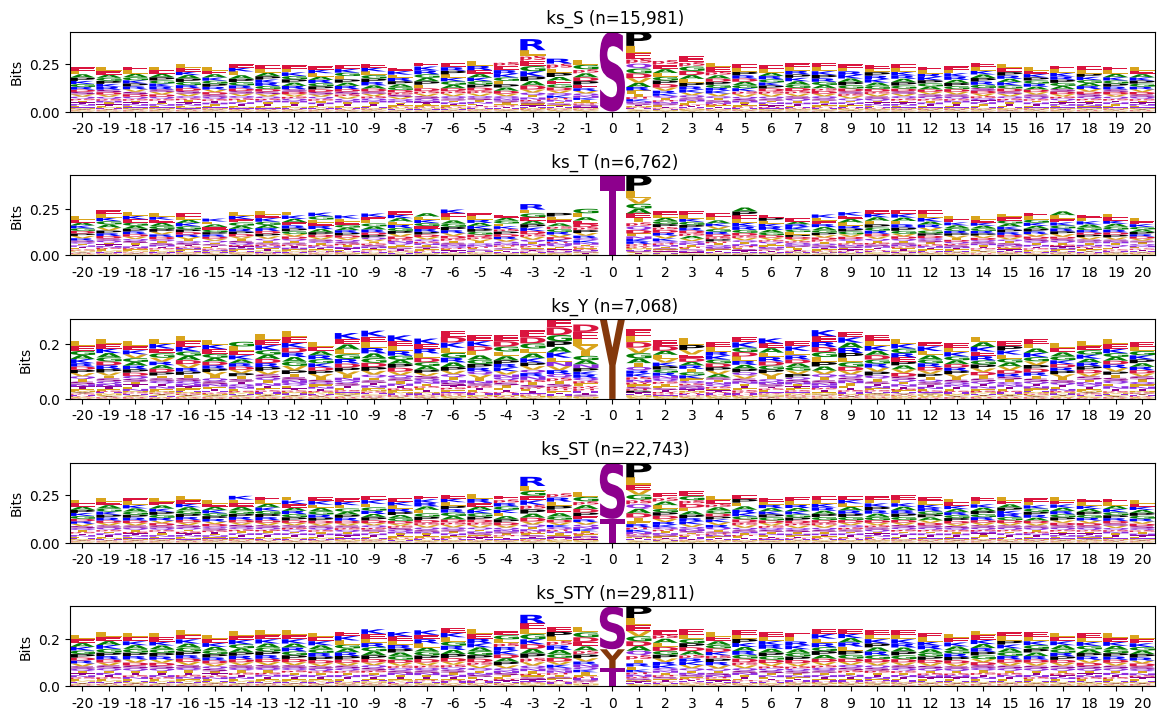

In [13]:
plot_logos(bg_pssms,cnt,prefix='')

## PSSMs - human phosphoproteome

In [14]:
human = Data.get_human_site()

In [15]:
human['acceptor']=human.site.str[0]

In [16]:
human.head(1)

,substrate_uniprot,substrate_genes,site,source,AM_pathogenicity,substrate_sequence,substrate_species,sub_site,substrate_phosphoseq,position,site_seq,acceptor
0,A0A024R4G9,C19orf48 MGC13170 hCG_2008493,S20,psp,NaN,MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,Homo sapiens (Human),A0A024R4G9_S20,MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTRTWLLSH...,20,_MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTR,S


In [17]:
index_names2 = 'human_' + pd.Series(acceptors)

In [18]:
bg_pssms_human = pd.DataFrame([get_bg_dict(human,acceptor) for acceptor in acceptors],index=index_names2)

In [19]:
bg_pssms_human

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
human_S,0.08364,0.06732,0.07243,0.01298,0.06843,0.04076,0.04860,0.03262,0.08046,0.01853,...,0.02240,0.06643,0.06452,0.04737,0.03316,0.05179,0.07982,0.04460,0.01317,0.00367
human_T,0.07986,0.06436,0.07476,0.01194,0.06270,0.04093,0.05299,0.03346,0.07854,0.02181,...,0.02007,0.07009,0.06264,0.04805,0.03220,0.05181,0.07866,0.04366,0.01702,0.00485
human_Y,0.07390,0.06714,0.07310,0.01602,0.05840,0.03946,0.05178,0.04145,0.08741,0.02026,...,0.02177,0.06572,0.05960,0.04994,0.03130,0.05538,0.07811,0.03470,0.01619,0.01660
human_ST,0.08279,0.06666,0.07295,0.01275,0.06714,0.04079,0.04959,0.03281,0.08003,0.01927,...,0.02188,0.06725,0.06410,0.04752,0.03295,0.05180,0.07956,0.04439,0.01403,0.00394
human_STY,0.08221,0.06669,0.07296,0.01296,0.06657,0.04071,0.04973,0.03338,0.08052,0.01933,...,0.02187,0.06715,0.06381,0.04768,0.03284,0.05203,0.07946,0.04377,0.01417,0.00475


In [20]:
all_pssms = pd.concat([bg_pssms,bg_pssms_human])

In [21]:
# all_pssms.to_parquet('~/katlas/dataset/CDDM/ks_background.parquet')

Accessible through Data.get_ks_background

In [22]:
cnt_human = {name:get_site_cnt(human,acceptor) for acceptor,name in zip(acceptors,index_names2)}

In [23]:
cnt.update(cnt_human)

In [24]:
cnt

{'ks_S': 15981,
 'ks_T': 6762,
 'ks_Y': 7068,
 'ks_ST': 22743,
 'ks_STY': 29811,
 'human_S': 86995,
 'human_T': 25091,
 'human_Y': 7869,
 'human_ST': 112086,
 'human_STY': 119955}

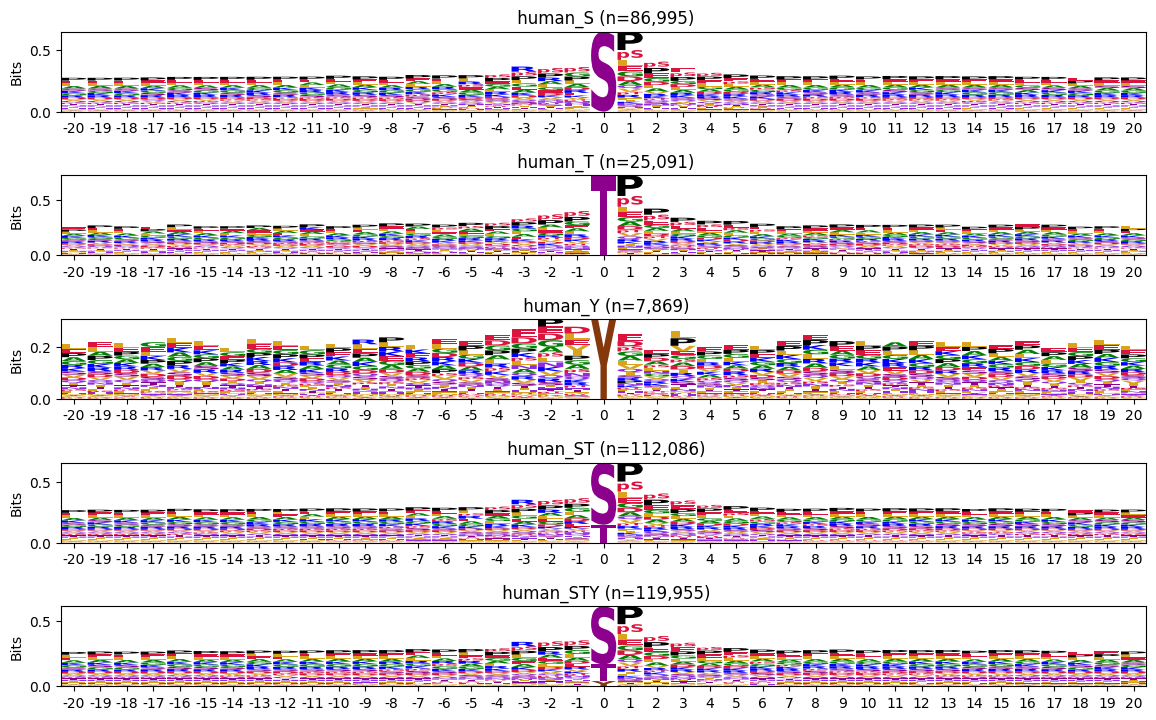

In [25]:
plot_logos(bg_pssms_human,cnt,prefix='')